<a href="https://colab.research.google.com/github/anantpatil146/DeepLearning-Practical-1/blob/main/ANANT_PATIL_DeepLearningLabAssignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Logistic Regression Using Library**



In [26]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

from google.colab import drive
drive.mount('/content/drive')

# Load dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Check the dataset and ensure no missing values
df = df.dropna()

# Select relevant features and target variable
X = df[['Sales', 'Cost', 'Profit/Loss']]  # 'Profit/Loss' is now numeric and used as a feature
y = df['Status']

# Encode target variable: Profit=1, Loss=0
y = LabelEncoder().fit_transform(y)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', classification_report(y_test, y_pred))


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Accuracy: 0.97
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.95      0.96      2532
           1       0.96      0.98      0.97      3468

    accuracy                           0.97      6000
   macro avg       0.97      0.96      0.97      6000
weighted avg       0.97      0.97      0.97      6000



**Logistic Regression From Scratch**


In [27]:
import numpy as np
import pandas as pd

# Logistic function (sigmoid)
def logistic(x):
    return 1 / (1 + np.exp(-x))

# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Preprocess data
df = df.dropna()
X = df[['Sales', 'Cost', 'Profit/Loss']].values  # Features
y = np.where(df['Status'] == 'Profit', 1, 0)  # Target variable (Profit=1, Loss=0)

# Feature Scaling (Standardization)
X = (X - X.mean(axis=0)) / X.std(axis=0)

# Add a column of ones for the bias term (intercept)
X = np.c_[np.ones(X.shape[0]), X]

# Initialize weights to zeros
weights = np.zeros(X.shape[1])

# Learning rate
learning_rate = 0.01

# Train the model
for _ in range(1000):  # 1000 iterations
    z = np.dot(X, weights)  # Linear combination of features and weights
    y_pred = logistic(z)  # Apply logistic function to get probabilities

    # Compute gradients (error term)
    dw = np.dot(X.T, (y_pred - y)) / len(y)

    # Update weights using gradient descent
    weights -= learning_rate * dw

# Predictions: Apply logistic function and use 0.5 threshold for classification
y_pred_final = logistic(np.dot(X, weights)) >= 0.5

# Accuracy
accuracy = np.mean(y_pred_final == y)
print(f'Accuracy: {accuracy:.2f}')


Accuracy: 0.96


**Plot Relu and TanEdge **

  Product_ID     Category        Sales         Cost  Profit/Loss  Status  \
0    P000001  Electronics  3360.903505  3030.377801   330.525704  Profit   
1    P000002        Books  3584.876068   232.522683  3352.353385  Profit   
2    P000003   Automobile  2604.069330  3053.215317  -449.145987    Loss   
3    P000004        Books   750.681031  4127.878103 -3377.197073    Loss   
4    P000005        Books  4633.295678  1725.502214  2907.793464  Profit   

   ReLU  Tanh  
0   0.0  -1.0  
1   0.0  -1.0  
2   0.0  -1.0  
3   0.0  -1.0  
4   0.0  -1.0  


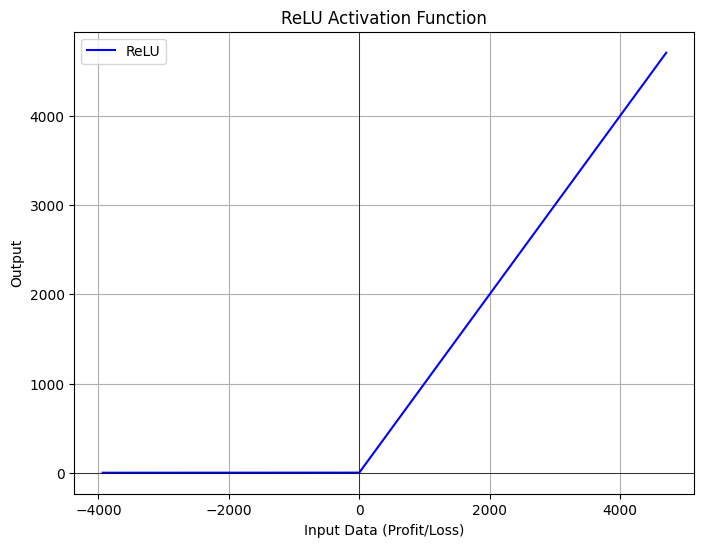

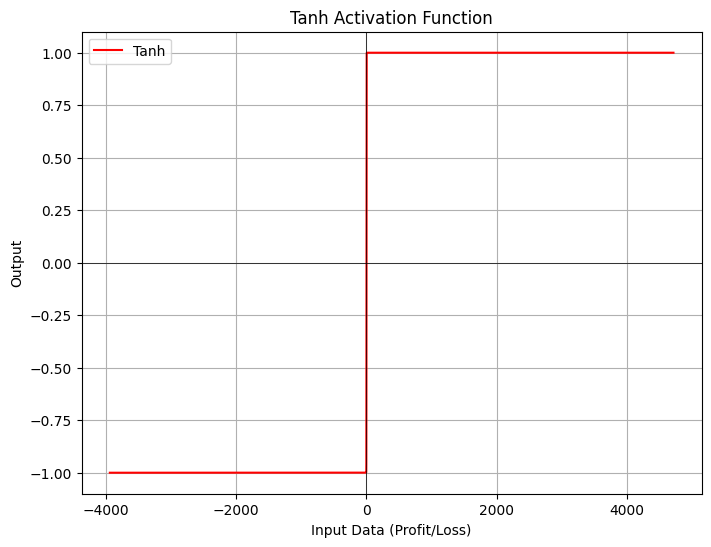

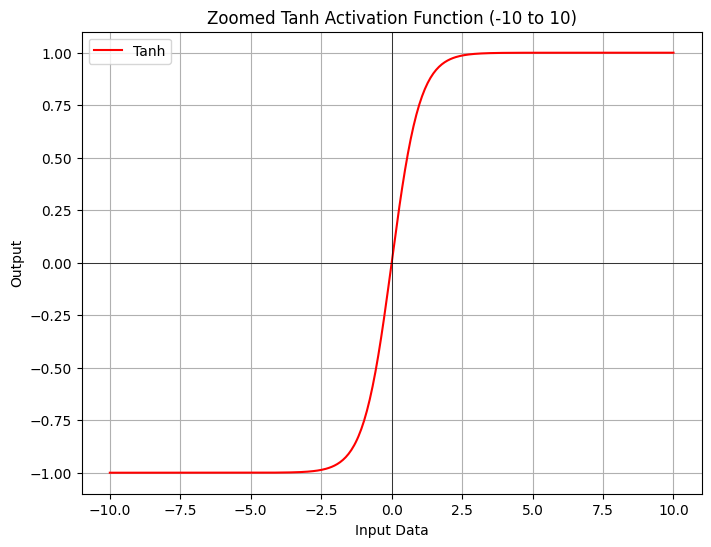

In [28]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Preprocess data
df = df.dropna()

# Select the numerical column (ensure correct column name)
data = df['Profit/Loss'].tolist()
data.sort()

def relu(x):
    return [max(0, i) for i in x]

def tanh(x):
    return [np.tanh(i) for i in x]

# Apply activation functions
df['ReLU'] = relu(data)
df['Tanh'] = tanh(data)

# Display results
print(df.head())

# Plot ReLU
plt.figure(figsize=(8, 6))
plt.plot(data, df['ReLU'], label='ReLU', color='blue')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('ReLU Activation Function')
plt.xlabel('Input Data (Profit/Loss)')
plt.ylabel('Output')
plt.grid()
plt.show()

# Plot Tanh
plt.figure(figsize=(8, 6))
plt.plot(data, df['Tanh'], label='Tanh', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Tanh Activation Function')
plt.xlabel('Input Data (Profit/Loss)')
plt.ylabel('Output')
plt.grid()
plt.show()

# Plot Tanh with x-axis limited to -100 to 100
plt.figure(figsize=(8, 6))
x_tanh = np.linspace(-10, 10, 400)
y_tanh = np.tanh(x_tanh)
plt.plot(x_tanh, y_tanh, label='Tanh', color='red')
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.legend()
plt.title('Zoomed Tanh Activation Function (-10 to 10)')
plt.xlabel('Input Data')
plt.ylabel('Output')
plt.grid()
plt.show()


**Log Loss And Cross Entropy**

In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression

# Load dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Drop missing values
df = df.dropna()

# Select relevant features and target
X = df[['Sales', 'Cost', 'Profit/Loss']].values
y = df['Status'].values  # 'Profit' or 'Loss'

# Encode target variable ('Profit' → 1, 'Loss' → 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # Converts to binary 0 (Loss) / 1 (Profit)

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Train logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)

# Get probability predictions
y_pred_probs = model.predict_proba(X_test)[:, 1]  # Probabilities for class 1 (Profit)

# ------------------------------
# **Vectorized Binary Log Loss**
# ------------------------------
def binary_log_loss(y_true, y_pred):
    """
    Computes vectorized binary cross-entropy loss.
    Args:
        y_true (numpy array): Actual labels (0 or 1), shape (m,)
        y_pred (numpy array): Predicted probabilities, shape (m,)
    Returns:
        log loss value (float)
    """
    epsilon = 1e-15  # Prevents log(0) issues
    y_pred = np.clip(y_pred, epsilon, 1 - epsilon)
    loss = -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))  # Vectorized
    return loss

# Compute Binary Log Loss
binary_loss = binary_log_loss(y_test, y_pred_probs)
print(f"Binary Log Loss (Vectorized): {binary_loss:.4f}")

# ------------------------------
# **Vectorized Multi-Class Cross-Entropy Loss**
# ------------------------------
def cross_entropy_loss(y_true, y_pred_probs):
    """
    Computes vectorized cross-entropy loss for multi-class classification.
    Args:
        y_true (numpy array): One-hot encoded actual labels, shape (m, k)
        y_pred_probs (numpy array): Predicted probabilities, shape (m, k)
    Returns:
        cross-entropy loss (float)
    """
    epsilon = 1e-15  # Prevents log(0)
    y_pred_probs = np.clip(y_pred_probs, epsilon, 1 - epsilon)
    loss = -np.mean(np.sum(y_true * np.log(y_pred_probs), axis=1))  # Fully vectorized
    return loss

# Example Multi-Class Encoding (Simulating a multi-class scenario)
num_classes = 3  # Example: Assume 3 categories
y_train_multi = np.eye(num_classes)[np.random.choice(num_classes, len(y_train))]  # One-hot encoded
y_test_multi = np.eye(num_classes)[np.random.choice(num_classes, len(y_test))]   # One-hot encoded

# Simulated probability predictions for 3 classes
y_pred_probs_multi = np.random.rand(len(y_test), num_classes)
y_pred_probs_multi = y_pred_probs_multi / np.sum(y_pred_probs_multi, axis=1, keepdims=True)  # Normalize to sum=1

# Compute Multi-Class Cross-Entropy Loss
multi_class_loss = cross_entropy_loss(y_test_multi, y_pred_probs_multi)
print(f"Multi-Class Cross-Entropy Loss (Vectorized): {multi_class_loss:.4f}")


Binary Log Loss (Vectorized): 0.2480
Multi-Class Cross-Entropy Loss (Vectorized): 1.3243


**ANN Using Sklearn **

Accuracy: 0.9698

Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.95      0.96      2532
           1       0.97      0.98      0.97      3468

    accuracy                           0.97      6000
   macro avg       0.97      0.97      0.97      6000
weighted avg       0.97      0.97      0.97      6000



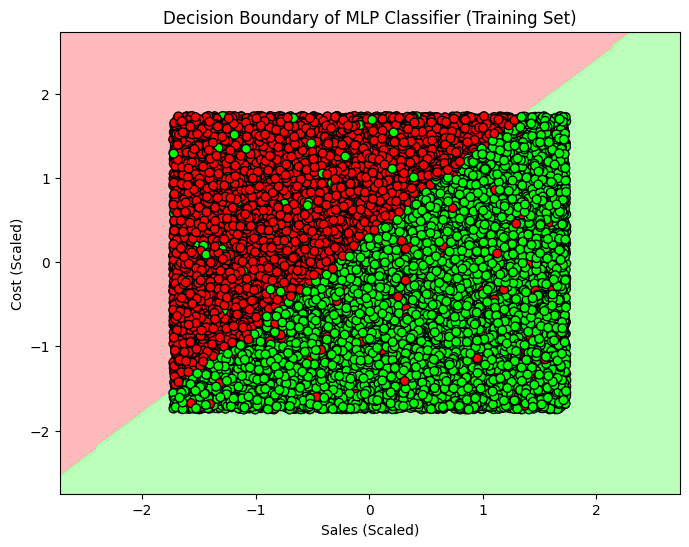

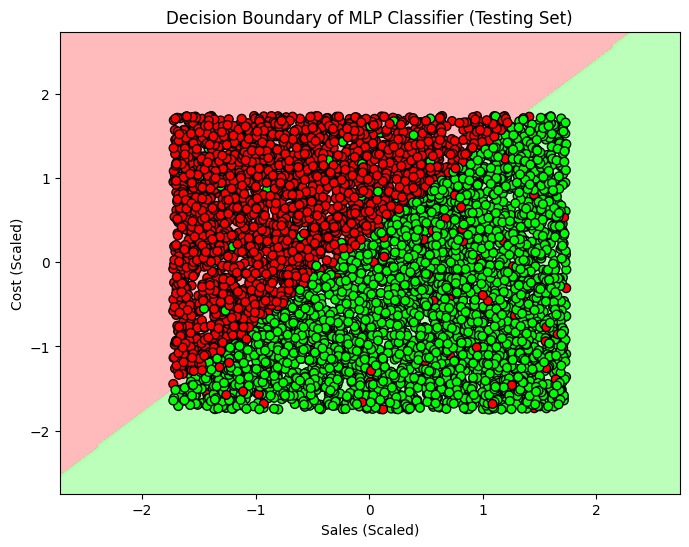

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Drop missing values
df = df.dropna()

# Select features (only 2 for 2D visualization)
X = df[['Sales', 'Cost']].values  # Only 2 features for plotting
y = df['Status'].values  # Target variable ('Profit' / 'Loss')

# Encode target variable ('Profit' -> 1, 'Loss' -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 1 for Profit, 0 for Loss

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ANN model (MLPClassifier)
mlp = MLPClassifier(hidden_layer_sizes=(10, 10), activation='relu', max_iter=1000, random_state=42)

# Train model
mlp.fit(X_train, y_train)

# Make predictions
y_pred = mlp.predict(X_test)

# Evaluate model
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# ------------------------------
# **Plot Decision Boundaries**
# ------------------------------
def plot_decision_boundary(X, y, model, title, dataset_type):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00'])

    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap=cmap_light)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold, edgecolor='k', s=40)
    plt.title(f"Decision Boundary of MLP Classifier ({dataset_type} Set)")
    plt.xlabel("Sales (Scaled)")
    plt.ylabel("Cost (Scaled)")
    plt.show()

# Plot for Training Set
plot_decision_boundary(X_train, y_train, mlp, "Decision Boundary", "Training")

# Plot for Testing Set
plot_decision_boundary(X_test, y_test, mlp, "Decision Boundary", "Testing")


**ANN Using Keras **

Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9039 - loss: 0.3514 - val_accuracy: 0.9610 - val_loss: 0.1959
Epoch 2/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9611 - loss: 0.1907 - val_accuracy: 0.9652 - val_loss: 0.1790
Epoch 3/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9645 - loss: 0.1851 - val_accuracy: 0.9592 - val_loss: 0.1708
Epoch 4/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9648 - loss: 0.1615 - val_accuracy: 0.9623 - val_loss: 0.1608
Epoch 5/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9660 - loss: 0.1548 - val_accuracy: 0.9640 - val_loss: 0.1558
Epoch 6/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9672 - loss: 0.1472 - val_accuracy: 0.9644 - val_loss: 0.1535
Epoch 7/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9665 - loss: 0.1527 - val_accuracy: 0.9606 - val_loss: 0.1569
Epoch 8/20
600/600 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9676 - loss: 0.1471 - val_accuracy: 0.9650 - val_

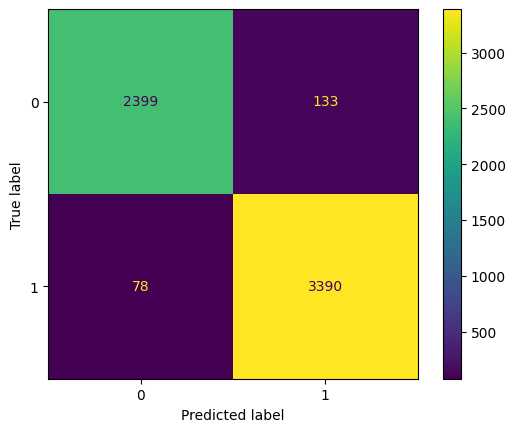

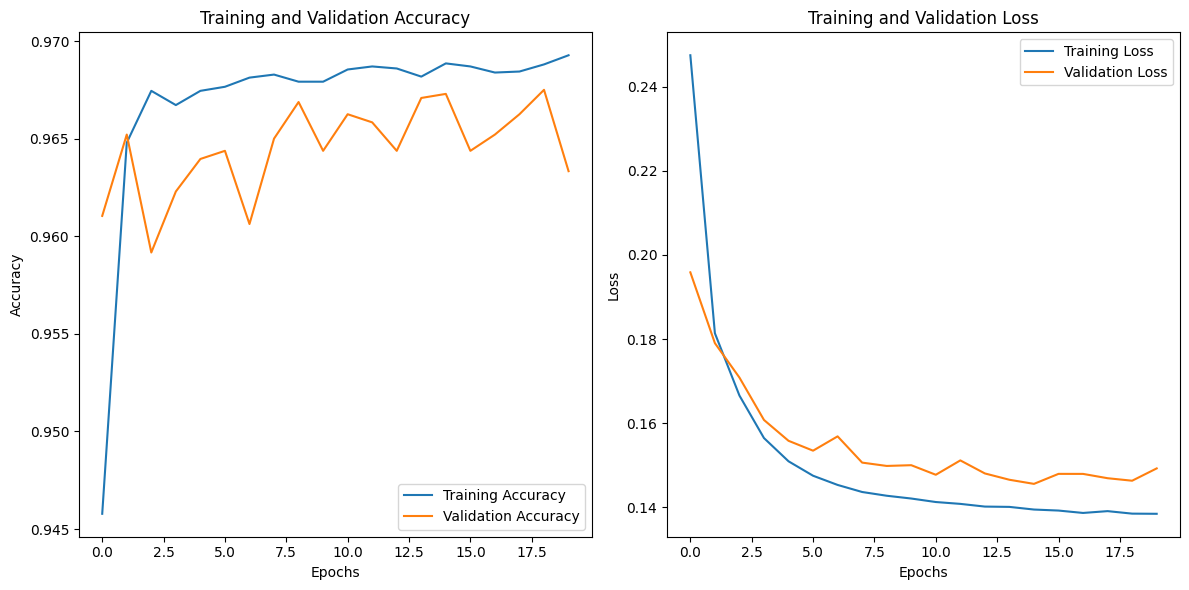

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, ConfusionMatrixDisplay
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Load dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Drop missing values
df = df.dropna()

# Select features and target
X = df[['Sales', 'Cost']].values  # Features (using only 2 for simplicity)
y = df['Status'].values  # Target variable ('Profit' / 'Loss')

# Encode target variable ('Profit' -> 1, 'Loss' -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)  # 1 for Profit, 0 for Loss

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define ANN model (Keras Sequential)
model = Sequential([
    Dense(32, activation='relu', input_dim=X_train.shape[1]),  # Hidden layer with 32 neurons
    Dense(16, activation='relu'),  # Hidden layer with 16 neurons
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2, verbose=1)

# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

# Predictions
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int)

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Plot Confusion Matrix
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)
plt.show()

# Extract training metrics
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

# Plot Accuracy
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plot Loss
plt.subplot(1, 2, 2)
plt.plot(loss, label='Training Loss')
plt.plot(val_loss, label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()


**ANN From Scratch**

In [32]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Activation Function (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(1, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(1, output_size)

    def forward(self, X):
        """ Forward pass: Computes activations """
        self.input_layer = X
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backward(self, X, y, learning_rate):
        """ Backpropagation: Computes and updates weights """
        error_output = y - self.output_layer_output
        output_layer_delta = error_output * sigmoid_derivative(self.output_layer_output)

        error_hidden = output_layer_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = error_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update weights and biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_layer_delta) * learning_rate
        self.bias_output += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate

        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        """ Trains the network using forward and backward passes """
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - self.output_layer_output))
                print(f"Epoch {epoch} - Loss: {loss:.6f}")

# Load dataset
df = pd.read_csv(r'/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Drop missing values
df = df.dropna()

# Select features and target
X = df[['Sales', 'Cost']].values
y = df['Status'].values  # Target variable ('Profit' / 'Loss')

# Encode target variable ('Profit' -> 1, 'Loss' -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y).reshape(-1, 1)  # Reshape for correct dimensions

# Split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize and train the neural network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X_train, y_train, epochs=10000, learning_rate=0.001)

# Test the model
print("\nPredictions on Test Data:")
predictions = nn.forward(X_test)
y_pred = (predictions > 0.5).astype(int)

# Print Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


Epoch 0 - Loss: 0.274797
Epoch 1000 - Loss: 0.032982
Epoch 2000 - Loss: 0.032061
Epoch 3000 - Loss: 0.031654
Epoch 4000 - Loss: 0.031413
Epoch 5000 - Loss: 0.031247
Epoch 6000 - Loss: 0.031124
Epoch 7000 - Loss: 0.031028
Epoch 8000 - Loss: 0.030949
Epoch 9000 - Loss: 0.030884

Predictions on Test Data:

Test Accuracy: 0.9698


**ANN Using Back Propogation**

In [33]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Sigmoid Activation Function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Derivative of Sigmoid Activation Function (for backpropagation)
def sigmoid_derivative(x):
    return x * (1 - x)

# Neural Network Class with Backpropagation
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Initialize weights and biases
        self.weights_input_hidden = np.random.randn(input_size, hidden_size)
        self.bias_hidden = np.random.randn(1, hidden_size)
        self.weights_hidden_output = np.random.randn(hidden_size, output_size)
        self.bias_output = np.random.randn(1, output_size)

    def forward(self, X):
        """ Forward Pass: Compute activations """
        self.input_layer = X
        self.hidden_layer_input = np.dot(self.input_layer, self.weights_input_hidden) + self.bias_hidden
        self.hidden_layer_output = sigmoid(self.hidden_layer_input)

        self.output_layer_input = np.dot(self.hidden_layer_output, self.weights_hidden_output) + self.bias_output
        self.output_layer_output = sigmoid(self.output_layer_input)

        return self.output_layer_output

    def backward(self, X, y, learning_rate):
        """ Backpropagation: Adjust weights based on errors """
        # Compute error in the output layer
        error_output = y - self.output_layer_output
        output_layer_delta = error_output * sigmoid_derivative(self.output_layer_output)

        # Compute error in the hidden layer
        error_hidden = output_layer_delta.dot(self.weights_hidden_output.T)
        hidden_layer_delta = error_hidden * sigmoid_derivative(self.hidden_layer_output)

        # Update Weights & Biases
        self.weights_hidden_output += self.hidden_layer_output.T.dot(output_layer_delta) * learning_rate
        self.bias_output += np.sum(output_layer_delta, axis=0, keepdims=True) * learning_rate
        self.weights_input_hidden += X.T.dot(hidden_layer_delta) * learning_rate
        self.bias_hidden += np.sum(hidden_layer_delta, axis=0, keepdims=True) * learning_rate

    def train(self, X, y, epochs, learning_rate):
        """ Train the network using forward and backward propagation """
        for epoch in range(epochs):
            self.forward(X)
            self.backward(X, y, learning_rate)

            # Print loss every 1000 epochs
            if epoch % 1000 == 0:
                loss = np.mean(np.square(y - self.output_layer_output))
                print(f"Epoch {epoch} - Loss: {loss:.6f}")

# Load Dataset
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/ecommerce_profit_loss.csv')

# Drop missing values
df = df.dropna()

# Select Features & Target
X = df[['Sales', 'Cost']].values
y = df['Status'].values  # Target variable ('Profit' / 'Loss')

# Encode Target ('Profit' -> 1, 'Loss' -> 0)
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y).reshape(-1, 1)  # Reshape for correct dimensions

# Split Data into Train & Test Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize Features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Initialize & Train Neural Network
nn = NeuralNetwork(input_size=2, hidden_size=4, output_size=1)
nn.train(X_train, y_train, epochs=10000, learning_rate=0.001)

# Evaluate Model on Test Data
print("\nPredictions on Test Data:")
predictions = nn.forward(X_test)
y_pred = (predictions > 0.5).astype(int)

# Print Accuracy
accuracy = np.mean(y_pred == y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


Epoch 0 - Loss: 0.236681
Epoch 1000 - Loss: 0.032973
Epoch 2000 - Loss: 0.032045
Epoch 3000 - Loss: 0.031641
Epoch 4000 - Loss: 0.031403
Epoch 5000 - Loss: 0.031241
Epoch 6000 - Loss: 0.031122
Epoch 7000 - Loss: 0.031030
Epoch 8000 - Loss: 0.030956
Epoch 9000 - Loss: 0.030894

Predictions on Test Data:

Test Accuracy: 0.9697
